2022-05-10 <br/>
NYTimes best sellers <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-05-10/readme.md

Rank / Bump chart - Completed 

Special thanks to : https://github.com/kartikay-bagla/bump-plot-python/blob/master/Examples.ipynb

In [1]:
import pandas as pd

In [2]:
df_full = pd.read_table('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-10/nyt_full.tsv')

In [3]:
df =df_full[df_full.year ==2020]

In [4]:
df.shape

(735, 6)

In [5]:
df_agg = df.groupby(['author'])['year'].agg('count')

In [6]:
df_agg.head()

author
Abi Daré             1
Akwaeke Emezi        1
Alex Michaelides    28
Alice Hoffman        1
Alka Joshi           1
Name: year, dtype: int64

In [7]:
df_agg= df.groupby(['author'])['year'].agg('count').nlargest(3).reset_index()
df_agg.head()

,author,year
0,Delia Owens,49
1,Jeanine Cummins,34
2,John Grisham,34


In [8]:
authors = df_agg.author.tolist()
authors

['Delia Owens', 'Jeanine Cummins', 'John Grisham']

In [9]:
df_author = df[df.author.isin(authors) ][['week','author','rank']]

In [10]:
df_author

,week,author,rank
59651,2020-01-05,Delia Owens,1
59652,2020-01-05,John Grisham,2
59666,2020-01-12,Delia Owens,1
59667,2020-01-12,John Grisham,2
59681,2020-01-19,Delia Owens,1
...,...,...,...
60351,2020-11-22,Delia Owens,11
60358,2020-11-29,John Grisham,3
60365,2020-11-29,Delia Owens,10
60373,2020-12-06,John Grisham,3


In [11]:
df_red= df_author.pivot(index='week', columns='author', values='rank').fillna(0)

In [12]:
df_red

author,Delia Owens,Jeanine Cummins,John Grisham
week,,,
2020-01-05,1.0,0.0,2.0
2020-01-12,1.0,0.0,2.0
2020-01-19,1.0,0.0,2.0
2020-01-26,1.0,0.0,5.0
2020-02-02,1.0,0.0,5.0
2020-02-09,2.0,1.0,7.0
2020-02-16,2.0,1.0,10.0
2020-02-23,4.0,1.0,12.0
2020-03-01,1.0,2.0,7.0


In [13]:
def bumpchart(df, show_rank_axis= True, rank_axis_distance= 1.1, 
              ax= None, scatter= False, holes= False,
              line_args= {}, scatter_args= {}, hole_args= {}):
    
    if ax is None:
        left_yaxis= plt.gca()
    else:
        left_yaxis = ax

    # Creating the right axis.
    right_yaxis = left_yaxis.twinx()
    
    axes = [left_yaxis, right_yaxis]
    
    # Creating the far right axis if show_rank_axis is True
    if show_rank_axis:
        far_right_yaxis = left_yaxis.twinx()
        axes.append(far_right_yaxis)
    
    for col in df.columns:
        y = df[col]
        x = df.index.values
        # Plotting blank points on the right axis/axes 
        # so that they line up with the left axis.
        for axis in axes[1:]:
            axis.plot(x, y, alpha= 0)

        left_yaxis.plot(x, y, **line_args, solid_capstyle='round')
        
        # Adding scatter plots
        if scatter:
            left_yaxis.scatter(x, y, **scatter_args)
            
            #Adding see-through holes
            if holes:
                bg_color = left_yaxis.get_facecolor()
                left_yaxis.scatter(x, y, color= bg_color, **hole_args)

    # Number of lines
    lines = len(df.columns)

    y_ticks = [*range(1, lines + 1)]
    
    # Configuring the axes so that they line up well.
    for axis in axes:
        axis.invert_yaxis()
        axis.set_yticks(y_ticks)
        axis.set_ylim((lines + 0.5, 0.5))
    
    # Sorting the labels to match the ranks.
    left_labels = df.iloc[0].sort_values().index
    right_labels = df.iloc[-1].sort_values().index
    
    left_yaxis.set_yticklabels(left_labels)
    right_yaxis.set_yticklabels(right_labels)
    
    # Setting the position of the far right axis so that it doesn't overlap with the right axis
    if show_rank_axis:
        far_right_yaxis.spines["right"].set_position(("axes", rank_axis_distance))
    
    return axes

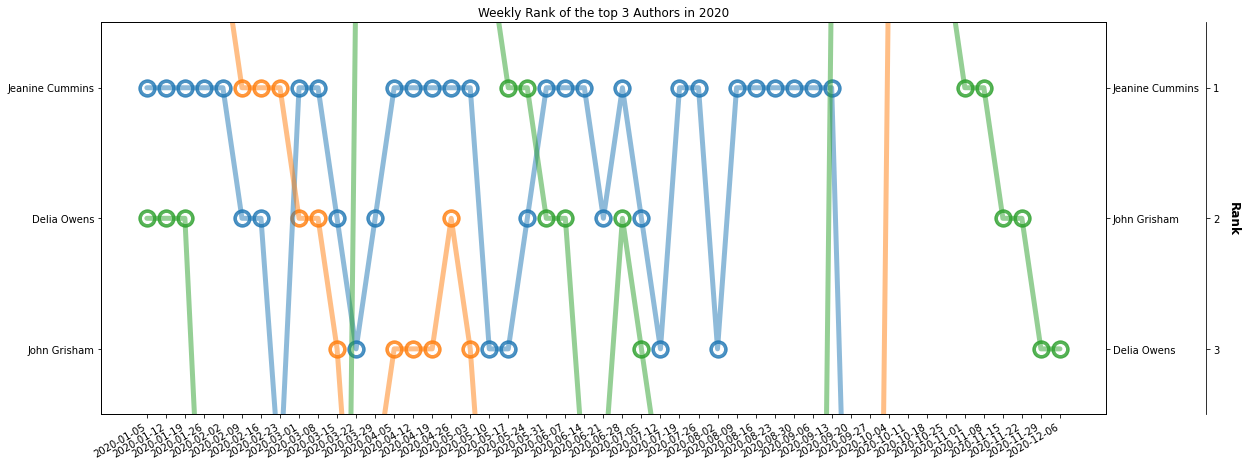

In [14]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(18, 8))
[laxis, raxis, fraxis]=bumpchart(df_red, show_rank_axis= True, rank_axis_distance= 1.1, 
                        ax= None, 
                        scatter= True, 
                        holes= True,
                        line_args= {"linewidth": 5, "alpha": 0.5},
                        scatter_args= {"s": 300, "alpha": 0.8},
                        hole_args= {"s": 100, "alpha": 1})

laxis.set_axisbelow(True)

fraxis.set_ylabel("Rank", rotation= -90, labelpad= 20, fontsize= 12, weight= "semibold")\

plt.gcf().autofmt_xdate()

plt.title ('Weekly Rank of the top 3 Authors in 2020')
plt.show()
